In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import f_oneway, kruskal

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set(style="whitegrid")


## Load the cleaned datasets

In [4]:
# Load cleaned CSVs
benin = pd.read_csv('../data/benin_clean.csv')
sierra = pd.read_csv('../data/sierraleone_clean.csv')
togo = pd.read_csv('../data/togo_clean.csv')

# Add a country column to each
benin['Country'] = 'Benin'
sierra['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Combine into a single dataframe
df_all = pd.concat([benin, sierra, togo], ignore_index=True)
df_all.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Country
0,2021-08-09 00:01:00,0.0,0.0,0.0,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,Benin
1,2021-08-09 00:02:00,0.0,0.0,0.0,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,Benin
2,2021-08-09 00:03:00,0.0,0.0,0.0,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,Benin
3,2021-08-09 00:04:00,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,Benin
4,2021-08-09 00:05:00,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,Benin


#### Metric Comparison — Boxplots

C:\Users\User\AppData\Local\Temp\ipykernel_41560\54200673.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df_all, palette='Set2')


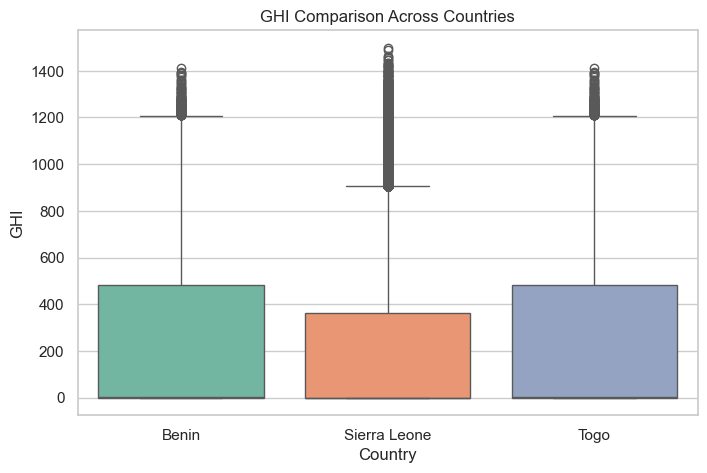

C:\Users\User\AppData\Local\Temp\ipykernel_41560\54200673.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df_all, palette='Set2')


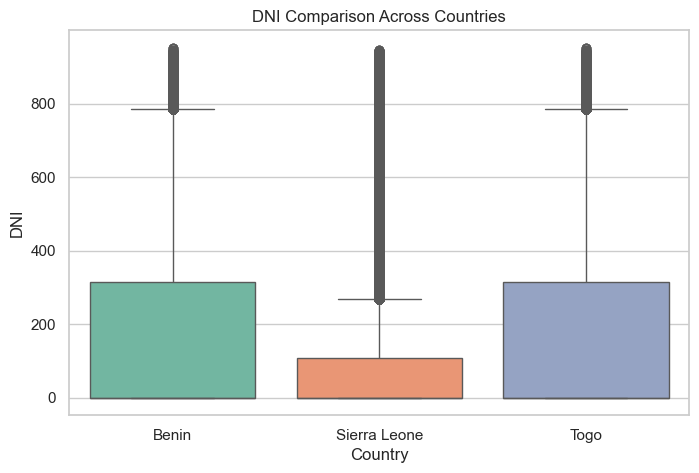

C:\Users\User\AppData\Local\Temp\ipykernel_41560\54200673.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df_all, palette='Set2')


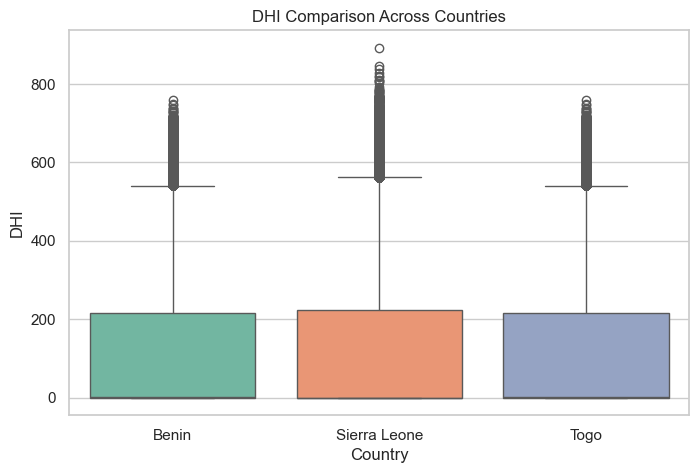

In [5]:
metrics = ['GHI', 'DNI', 'DHI']

for metric in metrics:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Country', y=metric, data=df_all, palette='Set2')
    plt.title(f'{metric} Comparison Across Countries')
    plt.ylabel(metric)
    plt.xlabel('Country')
    plt.show()

#### Summary Table

In [6]:
summary_table = df_all.groupby('Country')[metrics].agg(['mean', 'median', 'std'])
summary_table


GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         241.958821    1.8  330.101787  167.441866    0.0  261.547532   
Sierra Leone  204.406778    0.3  296.787520  116.523731    0.0  218.573992   
Togo          241.958821    1.8  330.101787  167.441866    0.0  261.547532   

                     DHI                     
                    mean median         std  
Country                                      
Benin         116.993033    1.6  157.463619  
Sierra Leone  116.273677    0.0  157.020868  
Togo          116.993033    1.6  157.463619

## Statistical Testing 

In [7]:
# from scipy.stats import f_oneway, kruskal

# Extract GHI values for each country
ghi_benin = benin['GHI'].dropna()
ghi_sierra = sierra['GHI'].dropna()
ghi_togo = togo['GHI'].dropna()

# One-way ANOVA
anova_result = f_oneway(ghi_benin, ghi_sierra, ghi_togo)
print("One-way ANOVA result for GHI:")
print(f"F-statistic: {anova_result.statistic:.3f}, p-value: {anova_result.pvalue:.4f}")

# Kruskal-Wallis test (non-parametric alternative)
kruskal_result = kruskal(ghi_benin, ghi_sierra, ghi_togo)
print("\nKruskal-Wallis result for GHI:")
print(f"H-statistic: {kruskal_result.statistic:.3f}, p-value: {kruskal_result.pvalue:.4f}")


One-way ANOVA result for GHI:
F-statistic: 2422.014, p-value: 0.0000

Kruskal-Wallis result for GHI:
H-statistic: 1663.950, p-value: 0.0000


## Key Observations 


 (I will write write down the key observations)
 *  1
 *  2
 *  3



## Visual Summary — Bar chart of average GHI

C:\Users\User\AppData\Local\Temp\ipykernel_41560\188070733.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='Set3')


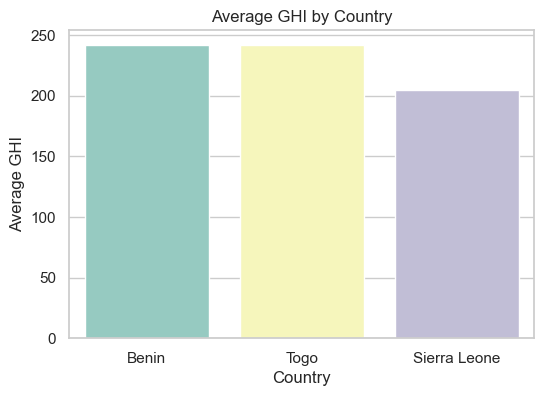

In [8]:
avg_ghi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='Set3')
plt.title('Average GHI by Country')
plt.ylabel('Average GHI')
plt.xlabel('Country')
plt.show()
